In [17]:
import sys
import glob
import numpy as np
import collections
import matplotlib.pyplot as plt

In [18]:
def makeReplicationHistForRunMode(runMode, percentileThresh, tsOrFet, numReps=11, winSize=10000):

    assert tsOrFet.lower() in ["ts","fet"]

    allScoreCompFileNames = glob.glob(f"/pine/scr/d/s/dschride/data/timeSeriesSweeps/compareToFETOut/rep*ScoreComp*_{runMode}.txt")

    scoreIndex = 2 if tsOrFet == "ts" else 3

    scores = []
    for cfn in allScoreCompFileNames:
        #sys.stderr.write(f'reading {cfn}\n')
        with open(cfn, 'rt') as cf:
            for line in cf:
                scores.append(float(line.strip().split()[scoreIndex]))
    threshold = np.percentile(scores, percentileThresh*100)
    sys.stderr.write(f'chosen threshold for {runMode}: ({percentileThresh*100}th percentile): {threshold}\n')

    repCounts = {}
    for rep in range(1, numReps):
        sys.stderr.write(f'processing rep {rep}\n')
        fn = f"/pine/scr/d/s/dschride/data/timeSeriesSweeps/replicationOfTopHits{'' if tsOrFet == 'ts' else 'FET'}/rep{rep}_{runMode}_repComp.txt"
        with open(fn, 'rt') as f:
            for line in f:
                line = line.strip()
                splitLine = line.split("\t")
                chrom, pos, tsScore, fetScore, freqVel, otherTsScoreStr, otherFetScoreStr, otherFreqVelsStr = splitLine
                pos = int(pos)
                pos = pos-(pos % winSize)

                if tsOrFet == "ts":
                    otherScores = [float(x) for x in otherTsScoreStr.split("|")]
                else:
                    otherScores = [float(x) for x in otherFetScoreStr.split("|")]

                replicationVector = [1 if x > threshold else 0 for x in otherScores]
                if (chrom, pos) in repCounts:
                    repCounts[(chrom, pos)] = max(sum(replicationVector), repCounts[(chrom, pos)])
                else:
                    repCounts[(chrom, pos)] = sum(replicationVector)
                    
    counts = collections.Counter(repCounts.values())
    outx, outy = [], []
    for i in range(0, numReps):
        print(tsOrFet, runMode, i, counts[i]/sum(counts.values()), counts[i])
        outy.append(counts[i]/sum(counts.values()))
        outx.append(i)
    return outx, outy

In [25]:
def plotBars(tsX, tsY, fetX, fetY, title):
    """code modified from
    https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html"""
    
    assert tsX == fetX
    
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(np.array(tsX) - width/2, tsY, width, label='TimeSweeper')
    rects2 = ax.bar(np.array(fetX) + width/2, fetY, width, label='FET')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Fraction of hits')
    ax.set_xlabel('Number of times a hit was replicated')
    ax.set_title(title)
    ax.legend()

    fig.tight_layout()

    plt.show()

chosen threshold for unif_vel_0_thresh: (99.0th percentile): 0.962
processing rep 1
processing rep 2
processing rep 3
processing rep 4
processing rep 5
processing rep 6
processing rep 7
processing rep 8
processing rep 9
processing rep 10


ts unif_vel_0_thresh 0 0.5568400770712909 289
ts unif_vel_0_thresh 1 0.30828516377649323 160
ts unif_vel_0_thresh 2 0.09826589595375723 51
ts unif_vel_0_thresh 3 0.02697495183044316 14
ts unif_vel_0_thresh 4 0.007707129094412331 4
ts unif_vel_0_thresh 5 0.0 0
ts unif_vel_0_thresh 6 0.0019267822736030828 1
ts unif_vel_0_thresh 7 0.0 0
ts unif_vel_0_thresh 8 0.0 0
ts unif_vel_0_thresh 9 0.0 0
ts unif_vel_0_thresh 10 0.0 0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.5568400770712909, 0.30828516377649323, 0.09826589595375723, 0.02697495183044316, 0.007707129094412331, 0.0, 0.0019267822736030828, 0.0, 0.0, 0.0, 0.0]


chosen threshold for unif_vel_0_thresh: (99.0th percentile): 11.998240505399968
processing rep 1
processing rep 2
processing rep 3
processing rep 4
processing rep 5
processing rep 6
processing rep 7
processing rep 8
processing rep 9
processing rep 10


fet unif_vel_0_thresh 0 0.6889848812095032 319
fet unif_vel_0_thresh 1 0.2159827213822894 100
fet unif_vel_0_thresh 2 0.07127429805615551 33
fet unif_vel_0_thresh 3 0.02159827213822894 10
fet unif_vel_0_thresh 4 0.0021598272138228943 1
fet unif_vel_0_thresh 5 0.0 0
fet unif_vel_0_thresh 6 0.0 0
fet unif_vel_0_thresh 7 0.0 0
fet unif_vel_0_thresh 8 0.0 0
fet unif_vel_0_thresh 9 0.0 0
fet unif_vel_0_thresh 10 0.0 0


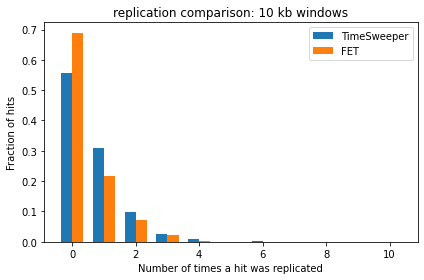

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.6889848812095032, 0.2159827213822894, 0.07127429805615551, 0.02159827213822894, 0.0021598272138228943, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [26]:
runMode = "unif_vel_0_thresh"
percentileThresh = 0.99
tsX, tsY = makeReplicationHistForRunMode(runMode, percentileThresh, "ts", winSize=10000)
print(tsX, tsY)
fetX, fetY = makeReplicationHistForRunMode(runMode, percentileThresh, "fet", winSize=10000)
plotBars(tsX, tsY, fetX, fetY, "replication comparison: 10 kb windows")
print(fetX, fetY)

chosen threshold for unif_vel_0_thresh: (99.0th percentile): 0.962
processing rep 1
processing rep 2
processing rep 3
processing rep 4
processing rep 5
processing rep 6
processing rep 7
processing rep 8
processing rep 9
processing rep 10


ts unif_vel_0_thresh 0 0.46017699115044247 156
ts unif_vel_0_thresh 1 0.35398230088495575 120
ts unif_vel_0_thresh 2 0.13274336283185842 45
ts unif_vel_0_thresh 3 0.038348082595870206 13
ts unif_vel_0_thresh 4 0.011799410029498525 4
ts unif_vel_0_thresh 5 0.0 0
ts unif_vel_0_thresh 6 0.0029498525073746312 1
ts unif_vel_0_thresh 7 0.0 0
ts unif_vel_0_thresh 8 0.0 0
ts unif_vel_0_thresh 9 0.0 0
ts unif_vel_0_thresh 10 0.0 0


chosen threshold for unif_vel_0_thresh: (99.0th percentile): 11.998240505399968
processing rep 1
processing rep 2
processing rep 3
processing rep 4
processing rep 5
processing rep 6
processing rep 7
processing rep 8
processing rep 9
processing rep 10


fet unif_vel_0_thresh 0 0.6892857142857143 193
fet unif_vel_0_thresh 1 0.2392857142857143 67
fet unif_vel_0_thresh 2 0.04642857142857143 13
fet unif_vel_0_thresh 3 0.02142857142857143 6
fet unif_vel_0_thresh 4 0.0035714285714285713 1
fet unif_vel_0_thresh 5 0.0 0
fet unif_vel_0_thresh 6 0.0 0
fet unif_vel_0_thresh 7 0.0 0
fet unif_vel_0_thresh 8 0.0 0
fet unif_vel_0_thresh 9 0.0 0
fet unif_vel_0_thresh 10 0.0 0


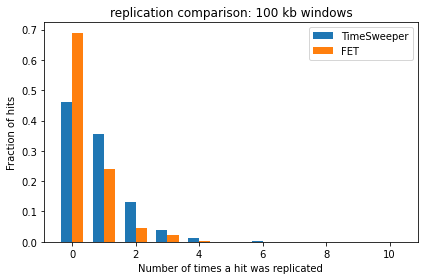

In [27]:
runMode = "unif_vel_0_thresh"
percentileThresh = 0.99
tsX, tsY = makeReplicationHistForRunMode(runMode, percentileThresh, "ts", winSize=100000)
fetX, fetY = makeReplicationHistForRunMode(runMode, percentileThresh, "fet", winSize=100000)
plotBars(tsX, tsY, fetX, fetY, "replication comparison: 100 kb windows")